# Notebook: Plot-Query-06
## Auteur: Noah Paulmier
## Date: 21 Mars 2025
## Formation: BUT Info, SAE204
### Objectif
#### Afficher les visualisations de la requête:
```
    Nombre de clients de l'hotel par mois
```

#### Import des composants et des données pour la connexion à la base de données

In [ ]:
import cx_Oracle
import db_config

#### Connexion à la BD SAE204

In [ ]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Nombre de réservations par chambre de l'hotel (id_hotel = 1) <br>
On introduit une variable de liaison, nommée ```v_id_hotel```, dans le code SQL de la requête

In [ ]:
query = """
        SELECT 
            EXTRACT(MONTH FROM RC.ARRIVEE) AS "Mois",
            COUNT(*) AS "Nbre de résa"
        FROM CLIENT C
        JOIN RESERVATION R ON C.ID_CLIENT = R.CLIENT
        JOIN RESERVATION_CHAMBRE RC ON R.ID_RESA = RC.RESERVATION
        JOIN CHAMBRE CH ON RC.CHAMBRE = CH.ID_CHAMBRE
        WHERE CH.HOTEL = :v_id_hotel
          AND EXTRACT(MONTH FROM RC.ARRIVEE) = :v_mois
        GROUP BY EXTRACT(MONTH FROM RC.ARRIVEE)
        ORDER BY EXTRACT(MONTH FROM RC.ARRIVEE)
        """

#### Import de la librairie ```matplotlib``` et l'interface ```pyplot```
Pour plus d'information: https://matplotlib.org/

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import random

In [38]:
x_label = "Mois"
y_label = "Nombres de clients"
x_data = []
y_data = []

def execute_query(id_hotel, mois):
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel = id_hotel, v_mois = mois)
    x_data.clear()
    y_data.clear()
    for row in vcursor.fetchall():
        x_data.append(row[0])
        y_data.append(row[1])

def init_plot():
    plt.figure()
    plt.rcParams["figure.figsize"] = [15, 4]
    plt.grid(True)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.suptitle('Nombre de réservations clients par mois de l\'hotel %s' %(id_hotel))

def add_data_plot(mois, type_chart='plot'):
    plt.grid(True)
    if len(y_data) > 0:
        plot_label = 'Mois %s' %(mois)
        color = (random.random(), random.random(), random.random())
        if (type_chart == 'plot'):
            plt.plot(x_data, y_data, color=color, label = plot_label)
        elif (type_chart == 'bar'):
            plt.bar(x_data, y_data, color=color, label = plot_label)

def show_plot():
    plt.legend(loc='upper right')
    plt.show()

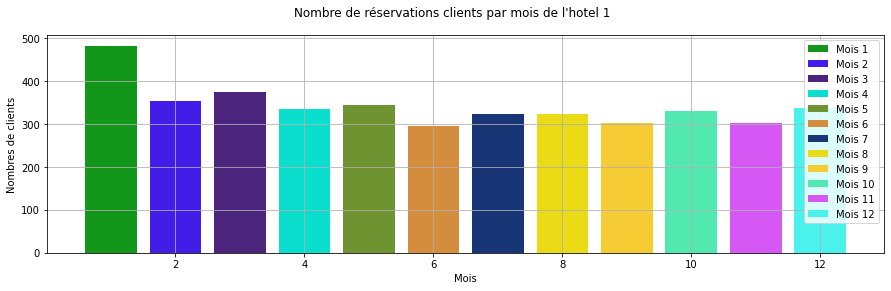

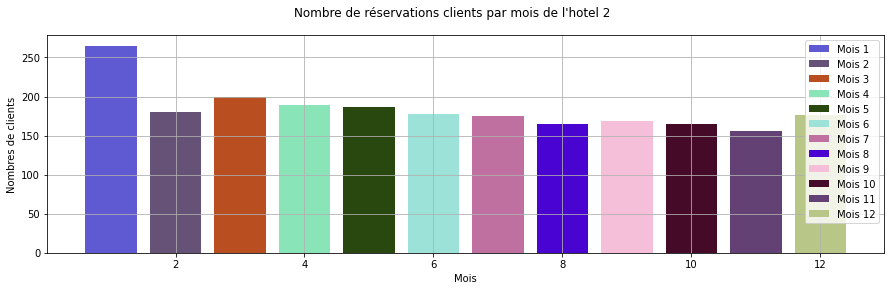

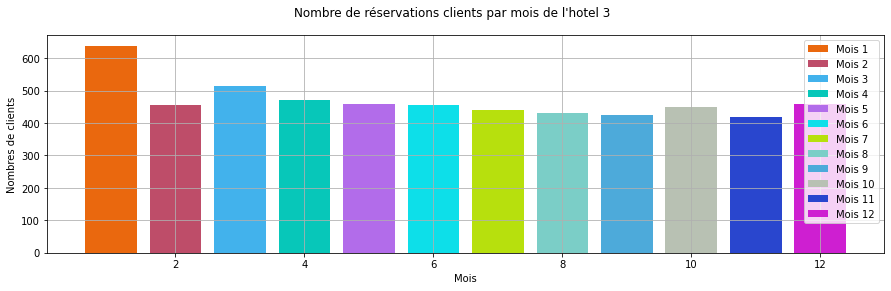

In [39]:
for id_hotel in [1, 2, 3]:
    init_plot()
    for mois in range(1,13):
        execute_query(id_hotel, mois)
        add_data_plot(mois, 'bar')
    show_plot()

In [80]:
vconnect.close()